In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy as shc
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h3>Reading data</h3>

In [41]:
df = pd.read_excel('coins_data.xlsx')
df.head(20)

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3.586504e+09,985239504,PoS,Ethereum
1,UNI,9.918768e+07,3.992451e+09,1000000000,PoS,Ethereum
2,WBTC,1.415410e+08,4.237575e+09,163106,PoW,Ethereum
3,AVAX,2.197065e+08,4.901630e+09,431804080,PoS,Avalanche
4,DAI,2.177113e+08,5.513661e+09,5347888596,stablecoin,Ethereum
5,SHIB,2.479944e+08,5.606251e+09,589589040239380,PoS,Ethereum
6,LTC,5.913019e+08,5.729295e+09,84000000,PoW,Litecoin
7,TRX,2.719028e+08,6.018922e+09,88996805683,PoS,Tron
8,DOT,2.035592e+08,6.659550e+09,1364182225,PoW,Polkadot
9,MATIC,4.232990e+08,8.053185e+09,10000000000,PoS,Polygon


<h3>Section 1</h3>

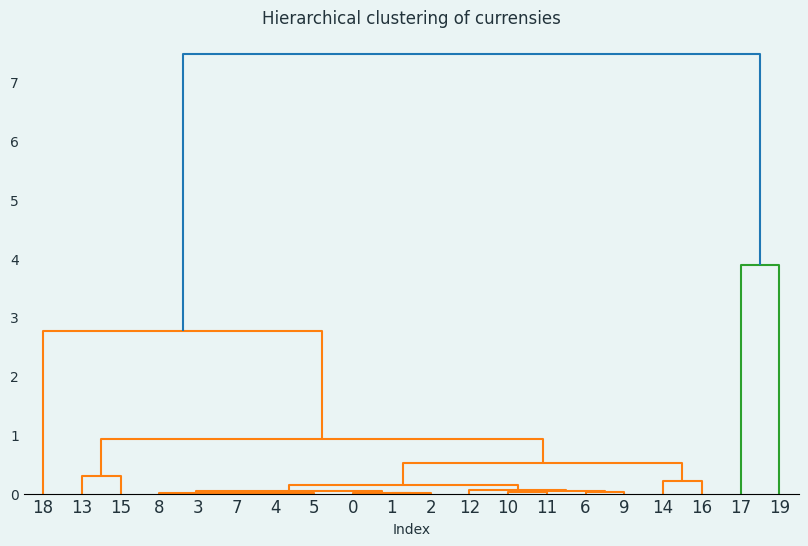

In [42]:
data = StandardScaler().fit_transform(df[['Volume', 'MarketCap']])
result=shc.linkage(data, method='ward')

fig, ax = plt.subplots(figsize=(10, 6))
shc.dendrogram(result)
ax.set_title("Hierarchical clustering of currensies", fontsize=12, color="#22333b")
ax.set_xlabel("Index", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

We have performed clustering using two characteristics: market cap and volume. As depicted in the dendrogram, currencies with similar market cap and volume were initially grouped together in one cluster. Subsequently, clusters that were in close proximity to each other were merged, resulting in higher-level clusters. Additionally, a general clustering pattern can be observed in this dendrogram, where **Tether and Bitcoin** are placed in one cluster, while the remaining currencies are grouped in another cluster due to Tether and Bitcoin significant differences in market cap and volume compared to other currencies.

<h3>Section 2</h3>

In [ ]:
data = df[['Volume', 'MarketCap', 'ProofType']]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['ProofType']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])

data = pd.concat([data, encoded_df], axis=1).drop('ProofType', axis=1)
data = StandardScaler().fit_transform(data)

Index of currensies with 'PoS' proftype [0, 1, 3, 5, 7, 9, 12, 16, 18]
Index of currensies with 'PoW' proftype [2, 6, 8, 11, 19]
Index of currensies with 'stablecoin' proftype [4, 13, 15, 17]
Index of currensies with 'PoH' proftype [10]
Index of currensies with 'RPCA' proftype [14]


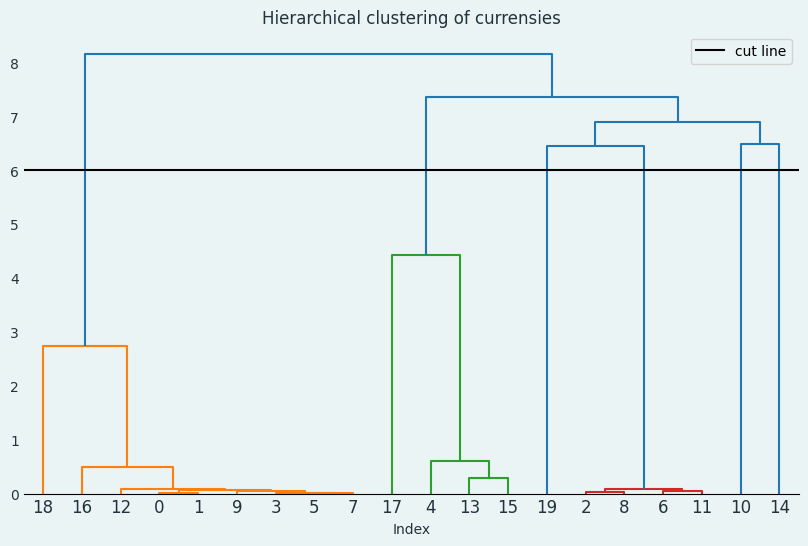

In [43]:
result=shc.linkage(data, method='ward')

fig, ax = plt.subplots(figsize=(10, 6))
shc.dendrogram(result)
ax.plot([0,500],[6,6], color='black', label='cut line')
ax.set_title("Hierarchical clustering of currensies", fontsize=12, color="#22333b")
ax.set_xlabel("Index", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend(facecolor="#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

PoS = df[df['ProofType'] == 'PoS'].index.to_list()
PoW = df[df['ProofType'] == 'PoW'].index.to_list()
stablecoin = df[df['ProofType'] == 'stablecoin'].index.to_list()
PoH = df[df['ProofType'] == 'PoH'].index.to_list()
RPCA = df[df['ProofType'] == 'RPCA'].index.to_list()
print('Index of currensies with \'PoS\' proftype',PoS)
print('Index of currensies with \'PoW\' proftype',PoW)
print('Index of currensies with \'stablecoin\' proftype',stablecoin)
print('Index of currensies with \'PoH\' proftype',PoH)
print('Index of currensies with \'RPCA\' proftype',RPCA)

We have performed clustering using three features: market cap, volume, and proof type. As observed above, by cutting the dendrogram at the marked black line, we obtain distinct clusters based on **proof type**. **Bitcoin** stands out in a separate cluster due to its substantial differences in market cap and volume compared to other currencies. In the clusters below, currencies with similar market cap and volume are grouped together.

<h3>Section 3</h3>

In [ ]:
data = df[['Volume', 'MarketCap', 'ProofType', 'Network']]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['ProofType']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
data = pd.concat([data, encoded_df], axis=1).drop('ProofType', axis=1)

encoded_data = encoder.fit_transform(data[['Network']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
data = pd.concat([data, encoded_df], axis=1).drop('Network', axis=1)

data = StandardScaler().fit_transform(data)

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3.586504e+09,985239504,PoS,Ethereum
1,UNI,9.918768e+07,3.992451e+09,1000000000,PoS,Ethereum
2,WBTC,1.415410e+08,4.237575e+09,163106,PoW,Ethereum
3,AVAX,2.197065e+08,4.901630e+09,431804080,PoS,Avalanche
4,DAI,2.177113e+08,5.513661e+09,5347888596,stablecoin,Ethereum
5,SHIB,2.479944e+08,5.606251e+09,589589040239380,PoS,Ethereum
6,LTC,5.913019e+08,5.729295e+09,84000000,PoW,Litecoin
7,TRX,2.719028e+08,6.018922e+09,88996805683,PoS,Tron
8,DOT,2.035592e+08,6.659550e+09,1364182225,PoW,Polkadot
9,MATIC,4.232990e+08,8.053185e+09,10000000000,PoS,Polygon


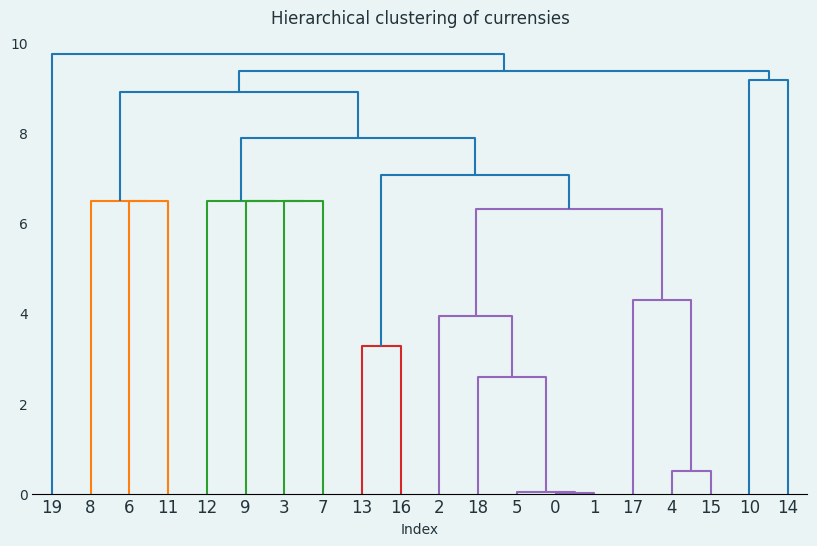

In [44]:
result=shc.linkage(data, method='ward')

fig, ax = plt.subplots(figsize=(10, 6))
shc.dendrogram(result)
ax.set_title("Hierarchical clustering of currensies", fontsize=12, color="#22333b")
ax.set_xlabel("Index", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
df.head(20)